TItle: Coffee Sales Analysis

In [2]:
import pandas as pd                   
import matplotlib.pyplot as plt                          

In [3]:
#uploading the datasets(tables)
orders=pd.read_excel("C:/Users/NEW USER/Documents/ORDERS.xlsx") 
products=pd.read_excel("C:/Users/NEW USER/Documents/PRODUCTS.xlsx")
customers=pd.read_excel("C:/Users/NEW USER/Documents/CUSTOMERS.xlsx")

In [4]:
#merging the first two tables
FirstMerge=pd.merge(customers,orders,on='Customer ID',how='inner')

In [5]:
#merging the third table
OrderData=pd.merge(FirstMerge,products,on='Product ID',how='inner')

Data Cleaning

In [7]:
#calling out the merged table
OrderData

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,R-M-1,2,Rob,M,1.0,9.950,0.9950,0.59700
1,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,E-M-0.5,5,Exc,M,0.5,8.250,1.6500,0.90750
2,21125-22134-PX,Jami Redholes,United States,Yes,FAA-43335-268,2021-06-17,A-L-1,1,Ara,L,1.0,12.950,1.2950,1.16550
3,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,E-M-1,2,Exc,M,1.0,13.750,1.3750,1.51250
4,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,R-L-2.5,2,Rob,L,2.5,27.485,1.0994,1.64910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62494-09113-RP,Marguerite Graves,United States,No,DUV-12075-132,2022-06-06,L-D-0.5,2,Lib,D,0.5,7.770,1.5540,1.01010
996,62494-09113-RP,Marguerite Graves,United States,No,AEZ-13242-456,2022-05-04,R-M-0.5,5,Rob,M,0.5,5.970,1.1940,0.35820
997,62494-09113-RP,Marguerite Graves,United States,No,UME-75640-698,2019-10-11,A-M-0.5,4,Ara,M,0.5,6.750,1.3500,0.60750
998,64965-78386-MY,Nicolina Jenny,United States,No,GJC-66474-557,2021-08-03,A-D-1,1,Ara,D,1.0,9.950,0.9950,0.89550


In [8]:
#writing the records in full and updating the column

OrderData['Roast Type']=OrderData['Roast Type'].replace({'L':'Light','M':'Medium','L':'Light','D':'DARK'})

In [9]:
# calling out the columns

OrderData.columns

Index(['Customer ID', 'Customer Name', 'Country', 'Loyalty Card', 'Order ID',
       'Order Date', 'Product ID', 'Quantity', 'Coffee Type', 'Roast Type',
       'Size', 'Unit Price', 'Price per 100g', 'Profit'],
      dtype='object')

In [10]:
#to return the numbers of rows and columns
OrderData.shape

(1000, 14)

In [11]:
#writing the records in full and updating the column

OrderData[OrderData.duplicated()]

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit


In [12]:
#checking concise summary of the dataset foe null records abd correct datatypes

OrderData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Customer ID     1000 non-null   object        
 1   Customer Name   1000 non-null   object        
 2   Country         1000 non-null   object        
 3   Loyalty Card    1000 non-null   object        
 4   Order ID        1000 non-null   object        
 5   Order Date      1000 non-null   datetime64[ns]
 6   Product ID      1000 non-null   object        
 7   Quantity        1000 non-null   int64         
 8   Coffee Type     1000 non-null   object        
 9   Roast Type      1000 non-null   object        
 10  Size            1000 non-null   float64       
 11  Unit Price      1000 non-null   float64       
 12  Price per 100g  1000 non-null   float64       
 13  Profit          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
mem

EXPLORATION

In [14]:
#creating the sales column
OrderData['Total_sales']=OrderData['Unit Price']*OrderData['Quantity']
print(OrderData)

        Customer ID        Customer Name         Country Loyalty Card  \
0    17670-51384-MA       Aloisia Allner   United States          Yes   
1    17670-51384-MA       Aloisia Allner   United States          Yes   
2    21125-22134-PX        Jami Redholes   United States          Yes   
3    23806-46781-OU  Christoffer O' Shea         Ireland           No   
4    23806-46781-OU  Christoffer O' Shea         Ireland           No   
..              ...                  ...             ...          ...   
995  62494-09113-RP    Marguerite Graves   United States           No   
996  62494-09113-RP    Marguerite Graves   United States           No   
997  62494-09113-RP    Marguerite Graves   United States           No   
998  64965-78386-MY       Nicolina Jenny   United States           No   
999  77131-58092-GE    Vidovic Antonelli  United Kingdom          Yes   

          Order ID Order Date Product ID  Quantity Coffee Type Roast Type  \
0    QEV-37451-860 2019-09-05      R-M-1      

In [15]:
OrderData

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total_sales
0,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,R-M-1,2,Rob,Medium,1.0,9.950,0.9950,0.59700,19.900
1,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,E-M-0.5,5,Exc,Medium,0.5,8.250,1.6500,0.90750,41.250
2,21125-22134-PX,Jami Redholes,United States,Yes,FAA-43335-268,2021-06-17,A-L-1,1,Ara,Light,1.0,12.950,1.2950,1.16550,12.950
3,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,E-M-1,2,Exc,Medium,1.0,13.750,1.3750,1.51250,27.500
4,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,R-L-2.5,2,Rob,Light,2.5,27.485,1.0994,1.64910,54.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62494-09113-RP,Marguerite Graves,United States,No,DUV-12075-132,2022-06-06,L-D-0.5,2,Lib,DARK,0.5,7.770,1.5540,1.01010,15.540
996,62494-09113-RP,Marguerite Graves,United States,No,AEZ-13242-456,2022-05-04,R-M-0.5,5,Rob,Medium,0.5,5.970,1.1940,0.35820,29.850
997,62494-09113-RP,Marguerite Graves,United States,No,UME-75640-698,2019-10-11,A-M-0.5,4,Ara,Medium,0.5,6.750,1.3500,0.60750,27.000
998,64965-78386-MY,Nicolina Jenny,United States,No,GJC-66474-557,2021-08-03,A-D-1,1,Ara,DARK,1.0,9.950,0.9950,0.89550,9.950


In [16]:
#Calculating and adding cost column

OrderData['cost']=OrderData['Total_sales']-OrderData['Profit']

In [17]:
OrderData

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total_sales,cost
0,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,R-M-1,2,Rob,Medium,1.0,9.950,0.9950,0.59700,19.900,19.30300
1,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,E-M-0.5,5,Exc,Medium,0.5,8.250,1.6500,0.90750,41.250,40.34250
2,21125-22134-PX,Jami Redholes,United States,Yes,FAA-43335-268,2021-06-17,A-L-1,1,Ara,Light,1.0,12.950,1.2950,1.16550,12.950,11.78450
3,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,E-M-1,2,Exc,Medium,1.0,13.750,1.3750,1.51250,27.500,25.98750
4,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,R-L-2.5,2,Rob,Light,2.5,27.485,1.0994,1.64910,54.970,53.32090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62494-09113-RP,Marguerite Graves,United States,No,DUV-12075-132,2022-06-06,L-D-0.5,2,Lib,DARK,0.5,7.770,1.5540,1.01010,15.540,14.52990
996,62494-09113-RP,Marguerite Graves,United States,No,AEZ-13242-456,2022-05-04,R-M-0.5,5,Rob,Medium,0.5,5.970,1.1940,0.35820,29.850,29.49180
997,62494-09113-RP,Marguerite Graves,United States,No,UME-75640-698,2019-10-11,A-M-0.5,4,Ara,Medium,0.5,6.750,1.3500,0.60750,27.000,26.39250
998,64965-78386-MY,Nicolina Jenny,United States,No,GJC-66474-557,2021-08-03,A-D-1,1,Ara,DARK,1.0,9.950,0.9950,0.89550,9.950,9.05450


Analyzing Sales Performance

In [19]:
overall_sales=OrderData['Total_sales'].sum()

overall_sales

45134.25499999999

In [20]:
overall_quantity=OrderData['Quantity'].sum()

overall_quantity

3551

In [21]:
Avg_profit=OrderData['Profit'].mean()

Avg_profit

1.3013750499999996

In [22]:
# Which coffee types generate the most revenue and profit over the 4 years?

OrderData.groupby('Coffee Type')[['Total_sales','Profit']].sum().sort_values('Total_sales', ascending =False)

,Total_sales,Profit
Coffee Type,,
Exc,12306.440,388.15425
Lib,12054.075,470.26915
Ara,11768.495,291.70395
Rob,9005.245,151.24770


<Axes: title={'center': 'Revenue & Profit by Coffee Type'}, xlabel='Coffee Type'>

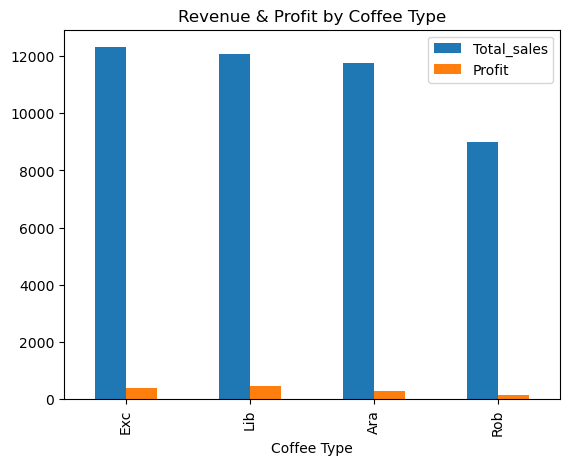

In [23]:
#viz

OrderData.groupby('Coffee Type')[['Total_sales','Profit']].sum().sort_values('Total_sales', ascending =False).plot(kind='bar', title='Revenue & Profit by Coffee Type')

In [24]:
#Adding year column

OrderData['year']=OrderData['Order Date'].dt.to_period('Y')

In [25]:
#. How have coffee sales changed over the years? (Sales trend)

OrderData.groupby('year')['Total_sales'].sum()

year
2019    12187.165
2020    12117.545
2021    13766.110
2022     7063.435
Freq: Y-DEC, Name: Total_sales, dtype: float64

<Axes: title={'center': 'Yearly Revenue Trend'}, xlabel='year'>

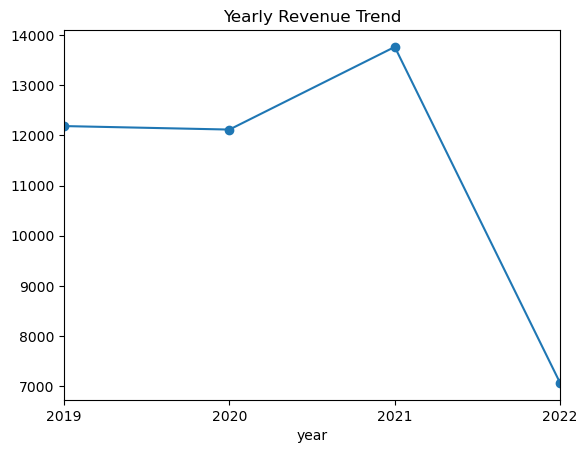

In [26]:
#viz
OrderData.groupby('year')['Total_sales'].sum().plot(marker='o', title='Yearly Revenue Trend')

In [27]:
#Who are the top 5 customers by total purchase?

Top_customers = OrderData.groupby('Customer Name')['Total_sales'].sum().sort_values(ascending =False).head(5)
Top_customers


Customer Name
Allis Wilmore      317.070
Brenn Dundredge    307.045
Terri Farra        289.110
Nealson Cuttler    281.675
Don Flintiff       278.010
Name: Total_sales, dtype: float64

<Axes: title={'center': 'Top 5 Customers by Revenue'}, ylabel='Customer Name'>

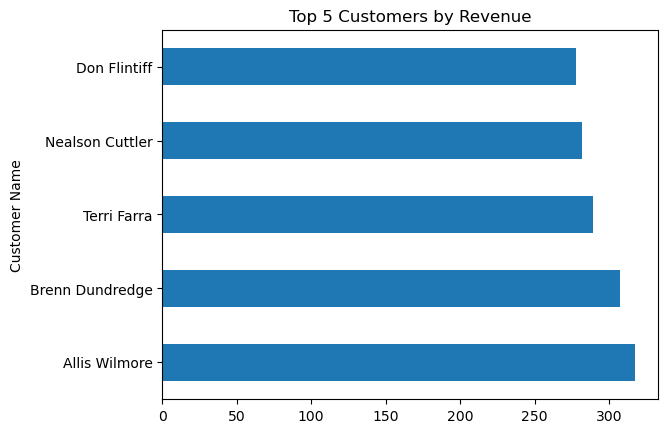

In [28]:
#viz

Top_customers.plot(kind='barh', title='Top 5 Customers by Revenue')

In [29]:
# Which roast type is most popular in each country?
roast_by_country = OrderData.groupby(['Country', 'Roast Type'])['Quantity'].sum().reset_index()
roast_by_country


,Country,Roast Type,Quantity
0,Ireland,DARK,224
1,Ireland,Light,180
2,Ireland,Medium,133
3,United Kingdom,DARK,64
4,United Kingdom,Light,86
5,United Kingdom,Medium,104
6,United States,DARK,868
7,United States,Light,964
8,United States,Medium,928


<Axes: title={'center': 'Roast Type Popularity by Country'}, xlabel='Country'>

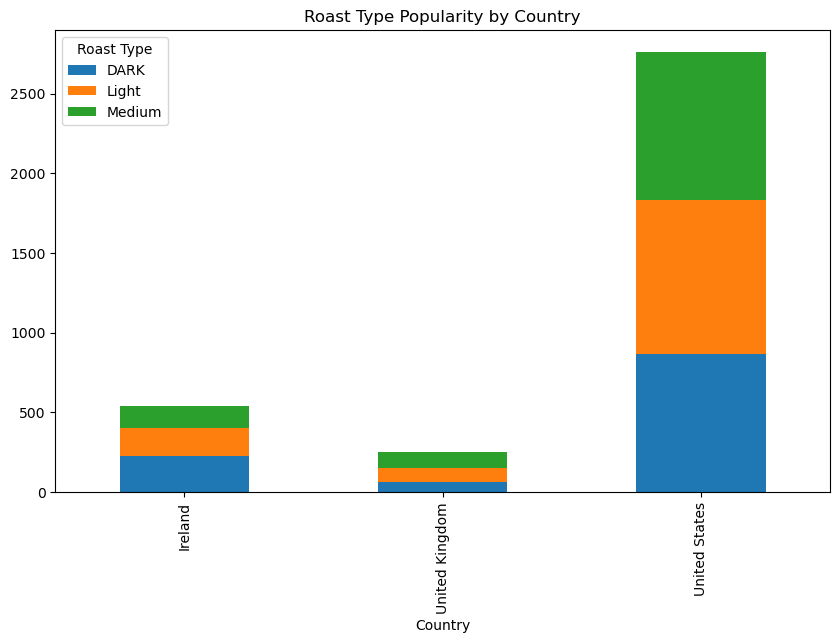

In [30]:
#viz
# Optional: Pivot for easier view

pivot = roast_by_country.pivot(index='Country', columns='Roast Type', values='Quantity').fillna(0)
pivot.plot(kind='bar', stacked=True, title='Roast Type Popularity by Country', figsize=(10, 6))


In [31]:
#calculating total sales by country
sales_by_country=OrderData.groupby('Country')['Total_sales'].sum().sort_values(ascending=False)
sales_by_country

Country
United States     35638.885
Ireland            6696.865
United Kingdom     2798.505
Name: Total_sales, dtype: float64

In [32]:
#calculating total profit by country
profit_by_country=OrderData.groupby('Country')['Profit'].sum().sort_values()
profit_by_country

Country
United Kingdom      86.59880
Ireland            202.02235
United States     1012.75390
Name: Profit, dtype: float64

In [33]:
#calculating total profit and average sales by country
answer=OrderData.groupby('Country').agg({'Total_sales':'mean','Profit':'sum'}) 
answer

,Total_sales,Profit
Country,,
Ireland,43.770359,202.02235
United Kingdom,38.335685,86.59880
United States,46.045071,1012.75390


In [34]:
#avg sales and total sales by country

OrderData.groupby('Country').agg({'Total_sales': ['mean', 'sum']})

Total_sales           
                      mean        sum
Country                              
Ireland          43.770359   6696.865
United Kingdom   38.335685   2798.505
United States    46.045071  35638.885

In [35]:
#avg sales and total sales by country and coffee type
OrderData.groupby(['Coffee Type','Country']).agg({'Total_sales': ['mean', 'sum']})

Total_sales           
                                  mean        sum
Coffee Type Country                              
Ara         Ireland          33.178171   1360.305
            United Kingdom   38.168571    267.180
            United States    46.949120  10141.010
Exc         Ireland          43.810000   1533.350
            United Kingdom   41.286087    949.580
            United States    51.976243   9823.510
Lib         Ireland          55.553462   2166.585
            United Kingdom   41.768810    877.145
            United States    47.927367   9010.345
Rob         Ireland          43.069079   1636.625
            United Kingdom   32.027273    704.600
            United States    36.817790   6664.020

In [36]:
#monthly trend
#Adding the month column extracted from the date column
OrderData['month']=OrderData['Order Date'].dt.to_period('M')

In [37]:
OrderData

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total_sales,cost,year,month
0,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,R-M-1,2,Rob,Medium,1.0,9.950,0.9950,0.59700,19.900,19.30300,2019,2019-09
1,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,E-M-0.5,5,Exc,Medium,0.5,8.250,1.6500,0.90750,41.250,40.34250,2019,2019-09
2,21125-22134-PX,Jami Redholes,United States,Yes,FAA-43335-268,2021-06-17,A-L-1,1,Ara,Light,1.0,12.950,1.2950,1.16550,12.950,11.78450,2021,2021-06
3,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,E-M-1,2,Exc,Medium,1.0,13.750,1.3750,1.51250,27.500,25.98750,2021,2021-07
4,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,R-L-2.5,2,Rob,Light,2.5,27.485,1.0994,1.64910,54.970,53.32090,2021,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62494-09113-RP,Marguerite Graves,United States,No,DUV-12075-132,2022-06-06,L-D-0.5,2,Lib,DARK,0.5,7.770,1.5540,1.01010,15.540,14.52990,2022,2022-06
996,62494-09113-RP,Marguerite Graves,United States,No,AEZ-13242-456,2022-05-04,R-M-0.5,5,Rob,Medium,0.5,5.970,1.1940,0.35820,29.850,29.49180,2022,2022-05
997,62494-09113-RP,Marguerite Graves,United States,No,UME-75640-698,2019-10-11,A-M-0.5,4,Ara,Medium,0.5,6.750,1.3500,0.60750,27.000,26.39250,2019,2019-10
998,64965-78386-MY,Nicolina Jenny,United States,No,GJC-66474-557,2021-08-03,A-D-1,1,Ara,DARK,1.0,9.950,0.9950,0.89550,9.950,9.05450,2021,2021-08


In [38]:
OrderData

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total_sales,cost,year,month
0,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,R-M-1,2,Rob,Medium,1.0,9.950,0.9950,0.59700,19.900,19.30300,2019,2019-09
1,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,E-M-0.5,5,Exc,Medium,0.5,8.250,1.6500,0.90750,41.250,40.34250,2019,2019-09
2,21125-22134-PX,Jami Redholes,United States,Yes,FAA-43335-268,2021-06-17,A-L-1,1,Ara,Light,1.0,12.950,1.2950,1.16550,12.950,11.78450,2021,2021-06
3,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,E-M-1,2,Exc,Medium,1.0,13.750,1.3750,1.51250,27.500,25.98750,2021,2021-07
4,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,R-L-2.5,2,Rob,Light,2.5,27.485,1.0994,1.64910,54.970,53.32090,2021,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62494-09113-RP,Marguerite Graves,United States,No,DUV-12075-132,2022-06-06,L-D-0.5,2,Lib,DARK,0.5,7.770,1.5540,1.01010,15.540,14.52990,2022,2022-06
996,62494-09113-RP,Marguerite Graves,United States,No,AEZ-13242-456,2022-05-04,R-M-0.5,5,Rob,Medium,0.5,5.970,1.1940,0.35820,29.850,29.49180,2022,2022-05
997,62494-09113-RP,Marguerite Graves,United States,No,UME-75640-698,2019-10-11,A-M-0.5,4,Ara,Medium,0.5,6.750,1.3500,0.60750,27.000,26.39250,2019,2019-10
998,64965-78386-MY,Nicolina Jenny,United States,No,GJC-66474-557,2021-08-03,A-D-1,1,Ara,DARK,1.0,9.950,0.9950,0.89550,9.950,9.05450,2021,2021-08


In [39]:
OrderData

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total_sales,cost,year,month
0,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,R-M-1,2,Rob,Medium,1.0,9.950,0.9950,0.59700,19.900,19.30300,2019,2019-09
1,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,E-M-0.5,5,Exc,Medium,0.5,8.250,1.6500,0.90750,41.250,40.34250,2019,2019-09
2,21125-22134-PX,Jami Redholes,United States,Yes,FAA-43335-268,2021-06-17,A-L-1,1,Ara,Light,1.0,12.950,1.2950,1.16550,12.950,11.78450,2021,2021-06
3,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,E-M-1,2,Exc,Medium,1.0,13.750,1.3750,1.51250,27.500,25.98750,2021,2021-07
4,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,R-L-2.5,2,Rob,Light,2.5,27.485,1.0994,1.64910,54.970,53.32090,2021,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62494-09113-RP,Marguerite Graves,United States,No,DUV-12075-132,2022-06-06,L-D-0.5,2,Lib,DARK,0.5,7.770,1.5540,1.01010,15.540,14.52990,2022,2022-06
996,62494-09113-RP,Marguerite Graves,United States,No,AEZ-13242-456,2022-05-04,R-M-0.5,5,Rob,Medium,0.5,5.970,1.1940,0.35820,29.850,29.49180,2022,2022-05
997,62494-09113-RP,Marguerite Graves,United States,No,UME-75640-698,2019-10-11,A-M-0.5,4,Ara,Medium,0.5,6.750,1.3500,0.60750,27.000,26.39250,2019,2019-10
998,64965-78386-MY,Nicolina Jenny,United States,No,GJC-66474-557,2021-08-03,A-D-1,1,Ara,DARK,1.0,9.950,0.9950,0.89550,9.950,9.05450,2021,2021-08


In [40]:
#This removes the column from the dataframe and the dataframe ius updated since it is called.. instead of using in place to update it
OrderData=OrderData.drop(columns='year')

In [41]:
OrderData

,Customer ID,Customer Name,Country,Loyalty Card,Order ID,Order Date,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total_sales,cost,month
0,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,R-M-1,2,Rob,Medium,1.0,9.950,0.9950,0.59700,19.900,19.30300,2019-09
1,17670-51384-MA,Aloisia Allner,United States,Yes,QEV-37451-860,2019-09-05,E-M-0.5,5,Exc,Medium,0.5,8.250,1.6500,0.90750,41.250,40.34250,2019-09
2,21125-22134-PX,Jami Redholes,United States,Yes,FAA-43335-268,2021-06-17,A-L-1,1,Ara,Light,1.0,12.950,1.2950,1.16550,12.950,11.78450,2021-06
3,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,E-M-1,2,Exc,Medium,1.0,13.750,1.3750,1.51250,27.500,25.98750,2021-07
4,23806-46781-OU,Christoffer O' Shea,Ireland,No,KAC-83089-793,2021-07-15,R-L-2.5,2,Rob,Light,2.5,27.485,1.0994,1.64910,54.970,53.32090,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62494-09113-RP,Marguerite Graves,United States,No,DUV-12075-132,2022-06-06,L-D-0.5,2,Lib,DARK,0.5,7.770,1.5540,1.01010,15.540,14.52990,2022-06
996,62494-09113-RP,Marguerite Graves,United States,No,AEZ-13242-456,2022-05-04,R-M-0.5,5,Rob,Medium,0.5,5.970,1.1940,0.35820,29.850,29.49180,2022-05
997,62494-09113-RP,Marguerite Graves,United States,No,UME-75640-698,2019-10-11,A-M-0.5,4,Ara,Medium,0.5,6.750,1.3500,0.60750,27.000,26.39250,2019-10
998,64965-78386-MY,Nicolina Jenny,United States,No,GJC-66474-557,2021-08-03,A-D-1,1,Ara,DARK,1.0,9.950,0.9950,0.89550,9.950,9.05450,2021-08


In [42]:
#Total monthly profit
MonthlyProfit= OrderData.groupby('month')['Profit'].sum()
MonthlyProfit

month
2019-01    23.86505
2019-02    33.92945
2019-03    31.04560
2019-04    43.11540
2019-05    13.10060
2019-06    31.13775
2019-07    26.60635
2019-08    19.06980
2019-09    36.75730
2019-10    30.60070
2019-11    28.39805
2019-12    31.09300
2020-01    26.23735
2020-02    42.90760
2020-03    26.59415
2020-04    22.10900
2020-05    29.35760
2020-06    41.12390
2020-07    37.04350
2020-08    10.76365
2020-09    16.23080
2020-10    47.50485
2020-11    30.89755
2020-12    22.99325
2021-01    28.79070
2021-02    27.63845
2021-03    42.00285
2021-04    28.79770
2021-05    27.16195
2021-06    22.08275
2021-07    19.36035
2021-08    28.00905
2021-09    38.80255
2021-10    43.39660
2021-11    42.74615
2021-12    30.98800
2022-01    39.57815
2022-02    16.77695
2022-03    39.76355
2022-04    24.18930
2022-05    34.11295
2022-06    28.26735
2022-07    27.79750
2022-08     8.62995
Freq: M, Name: Profit, dtype: float64

In [43]:
#Top 10customers by profit
TopCust=OrderData.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
TopCust

Customer Name
Nealson Cuttler     11.47300
Brenn Dundredge     11.34990
Cody Verissimo       9.07880
Allis Wilmore        8.06005
Derick Snow          5.97775
Don Flintiff         5.46365
Flynn Antony         5.42295
Hartley Mattioli     5.09735
Ailey Brash          4.95955
Brice Romera         4.88455
Name: Profit, dtype: float64

In [44]:
#loyalty card impact 
Loyalty=OrderData.groupby('Loyalty Card')['Profit'].sum()
Loyalty

Loyalty Card
No     685.36415
Yes    616.01090
Name: Profit, dtype: float64